This kernel is going to dealing in a problem statement on [Hackathon Competition: Customer Segmentation](https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/). In this competition, we will divide a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.

**Competition Description**:

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market. 

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers. 

You are required to help the manager to predict the right group of the new customers.

# Import Libraries & The Data
First, we import necessary libraries, such as:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

Then, import the data

In [2]:
train = pd.read_csv('/kaggle/input/customer/Train.csv')
test = pd.read_csv('/kaggle/input/customer/Test.csv')
sample_submission = pd.read_csv('/kaggle/input/customer/sample_submission.csv')

# Exploratory Data Analysis
### Train and Test Data Exploration
Display the ```head()``` to familiarize ourself with the data.

In [3]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


Now, let's take a quick look at the train and test datasets to gain some initial insight.

In [4]:
#combine train and test dataset
combined_data = pd.concat([train, test], ignore_index=True)

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [5]:
combined_data.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,10695.000000,10695,10505,10695.000000,10593,10533,9597.000000,10695,10247.000000,10587,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,5841,6163,NaN,6570,3318,NaN,6494,NaN,6910,2268
mean,463468.088640,NaN,NaN,43.511828,NaN,NaN,2.619777,NaN,2.844052,NaN,NaN
std,2600.966411,NaN,NaN,16.774158,NaN,NaN,3.390790,NaN,1.536427,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461220.500000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463451.000000,NaN,NaN,41.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465733.500000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


Check for percentage of missing values in each feature

In [6]:
print('Percentage of missing values:')
print('-----------------------------')
print(combined_data.isnull().sum().sort_values(ascending=False)[1:] / 10695 * 100)

Percentage of missing values:
-----------------------------
Work_Experience    10.266480
Family_Size         4.188873
Ever_Married        1.776531
Profession          1.514727
Var_1               1.009818
Graduated           0.953717
Spending_Score      0.000000
Age                 0.000000
Gender              0.000000
ID                  0.000000
dtype: float64


### Check for Imbalance of Target Array

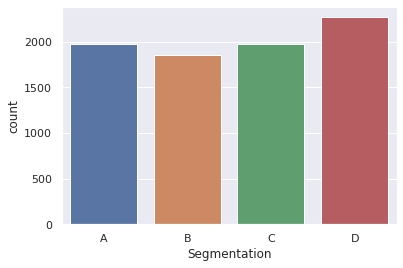

In [7]:
#check for imbalance
sns.countplot(train['Segmentation'], order=['A','B','C','D']);

The target array is balance, so it is a balance classifiction problem.

### Plot The Distribution of Numerical Features

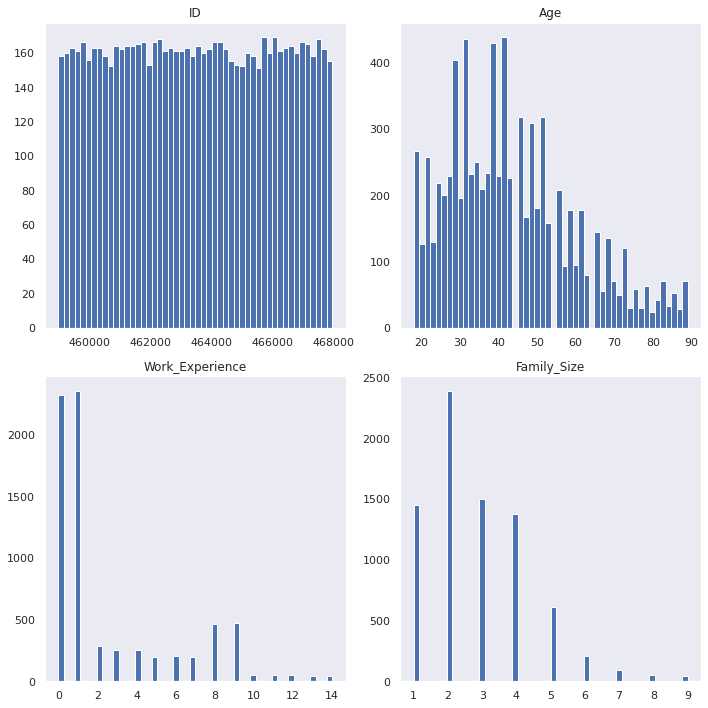

In [8]:
#plot the distribution of numerical features
train.hist(bins=50,figsize=(10,10),grid=False)
plt.tight_layout()
plt.show()

The distribution of numerical features are right skewed. So, we need to transform it later.

### Check for Duplicate

In [9]:
#check for duplicate
print('Duplicated value(s) on the train dataset : ', train.duplicated().sum())
print('Duplicated value(s) on the test dataset  : ', test.duplicated().sum())

Duplicated value(s) on the train dataset :  0
Duplicated value(s) on the test dataset  :  0


### Fill Missing Data
We will start with the most missing values, and then continuing our way to the least.

- Work_Experience

The missing values will be filled in the Feature Engineering Section, because we will need the missing values there.

- Family_Size

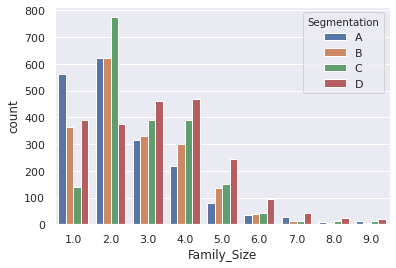

In [10]:
sns.countplot('Family_Size', hue='Segmentation', data=train, hue_order=['A','B','C','D']);

In [11]:
#fill with mode
train['Family_Size'].fillna(train['Family_Size'].mode()[0], inplace=True)
test['Family_Size'].fillna(test['Family_Size'].mode()[0], inplace=True)

- Ever_Married

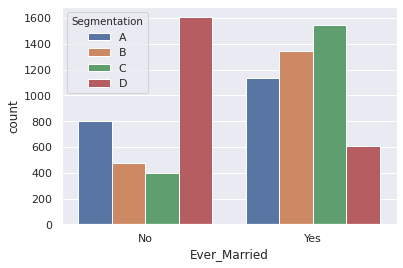

In [12]:
sns.countplot('Ever_Married', hue='Segmentation', data=train, hue_order=['A','B','C','D']);

In [13]:
#fill with mode
train['Ever_Married'].fillna(train['Ever_Married'].mode()[0], inplace=True)
test['Ever_Married'].fillna(test['Ever_Married'].mode()[0], inplace=True)

- Profession

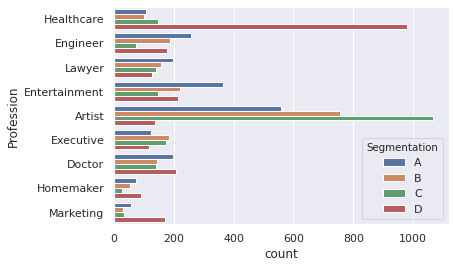

In [14]:
sns.countplot(y='Profession', hue='Segmentation', data=train, hue_order=['A','B','C','D']);

We can see that most of the artists are in segment C and most of the Healthcare are in segment D.

In [15]:
train.loc[(train['Profession'].isnull() & (train['Segmentation']=='C')),['Profession']] = 'Artist'
train.loc[(train['Profession'].isnull() & (train['Segmentation']=='D')),['Profession']] = 'Healthcare'

Fill the rest with mode

In [16]:
#fill with mode
train['Profession'].fillna(train['Profession'].mode()[0], inplace=True)
test['Profession'].fillna(test['Profession'].mode()[0], inplace=True)

- Var_1

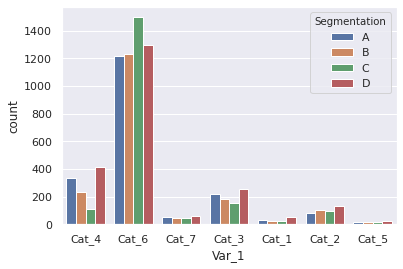

In [17]:
sns.countplot('Var_1', hue='Segmentation', data=train, hue_order=['A','B','C','D']);

In [18]:
#fill with mode
train['Var_1'].fillna(train['Var_1'].mode()[0], inplace=True)
test['Var_1'].fillna(test['Var_1'].mode()[0], inplace=True)

- Graduated

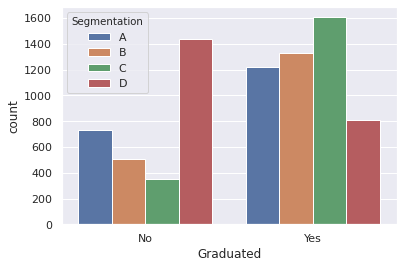

In [19]:
sns.countplot('Graduated', hue='Segmentation', data=train, hue_order=['A','B','C','D']);

In [20]:
train.loc[(train['Graduated'].isnull() & (train['Segmentation']=='D')), ['Graduated']] = 'No'

In [21]:
train['Graduated'].fillna(train['Graduated'].mode()[0], inplace=True)
test['Graduated'].fillna(test['Graduated'].mode()[0], inplace=True)

### Check for Any Missing Values

In [22]:
#check for missing values
train.isnull().sum().sort_values(ascending=False)

Work_Experience    829
Segmentation         0
Var_1                0
Family_Size          0
Spending_Score       0
Profession           0
Graduated            0
Age                  0
Ever_Married         0
Gender               0
ID                   0
dtype: int64

We will fill missing data in Work_Experience later.

# Feature Engineering
### Copy and Drop

In [23]:
#copy features that are needed later
target_array = train['Segmentation'].copy()
test_id = test['ID'].copy()

#drop features
train.drop(['Segmentation'], axis=1, inplace=True)

print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (8068, 10)
test shape:  (2627, 10)


### Creating New Features

In [24]:
#create Work_Experience_given feature
train['Work_Experience_is_given']=train['Work_Experience'].notnull()*1
test['Work_Experience_is_given']=train['Work_Experience'].notnull()*1

#fill missing values
train['Work_Experience'].fillna(train['Work_Experience'].mode()[0], inplace=True)
test['Work_Experience'].fillna(test['Work_Experience'].mode()[0], inplace=True)

In [25]:
#convert age in bins
#train['Age']=pd.cut(train['Age'],bins=[10,20,30,40,50,60,70,80,90],labels=[15,25,35,45,55,65,75,85])
#test['Age']=pd.cut(test['Age'],bins=[10,20,30,40,50,60,70,80,90],labels=[15,25,35,45,55,65,75,85])

#train['Age']=train['Age'].astype('int')
#test['Age']=test['Age'].astype('int')

### Labelling Data

In [26]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for feature in ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']:
    train[feature]=le.fit_transform(train[feature])
    test[feature]=le.transform(test[feature])

### Standardization

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
test = pd.DataFrame(scaler.transform(test), columns=test.columns)

### Normality Test

In [28]:
#define a normality test function
def normalityTest(data, alpha=0.05):
    """data (array)   : The array containing the sample to be tested.
	   alpha (float)  : Significance level.
	   return True if data is normal distributed"""
    
    from scipy import stats
    
    statistic, p_value = stats.normaltest(data)
    
    #null hypothesis: array comes from a normal distribution
    if p_value < alpha:  
        #The null hypothesis can be rejected
        is_normal_dist = False
    else:
        #The null hypothesis cannot be rejected
        is_normal_dist = True
    
    return is_normal_dist

In [29]:
#check normality of all numericaal features and transform it if not normal distributed
for feature in train.columns:
    if (train[feature].dtype != 'object'):
        if normalityTest(train[feature]) == False:
            train[feature] = np.log1p(train[feature])
            test[feature] = np.log1p(test[feature])

### Creating features matrix (X) and target array (y)

In [30]:
X = train
y = target_array

X_to_be_predicted = test

# Creating a Model
We begin by splitting data into two subsets: for training data and for testing data.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Model training : LGBMClassifier

In [32]:
from lightgbm import LGBMClassifier

#tuning the model
model = LGBMClassifier(learning_rate=0.1,
                       n_estimators=1200,
                       max_depth=5,
                       min_child_weight=1,
                       gamma=0,
                       subsample=0.8,
                       colsample_bytree=0.8,
                       nthread=4,
                       scale_pos_weight=3,
                       seed=27)

#fitting
model.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1,
               n_estimators=1200, nthread=4, scale_pos_weight=3, seed=27,
               subsample=0.8)

In [33]:
from sklearn.metrics import classification_report

#print a classification report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           A       0.89      0.86      0.88       394
           B       0.90      0.88      0.89       395
           C       0.92      0.92      0.92       390
           D       0.91      0.95      0.93       435

    accuracy                           0.90      1614
   macro avg       0.90      0.90      0.90      1614
weighted avg       0.90      0.90      0.90      1614



We get 90% accuracy.

In [34]:
#make a prediction
y_predict = model.predict(X_to_be_predicted)
y_predict

array(['A', 'A', 'C', ..., 'A', 'B', 'D'], dtype=object)

In [35]:
#sava results to a file
results = pd.DataFrame({'ID': test_id, 'Segmentation': y_predict})
results.to_csv('my_submission.csv', index=False)
results.head()

,ID,Segmentation
0,458989,A
1,458994,A
2,458996,C
3,459000,C
4,459001,D
